In [1]:
#Libraries 
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#Reading CSV Files
hap_15 = pd.read_csv("2015.csv")
hap_16 = pd.read_csv("2016.csv")
hap_17 = pd.read_csv("2017.csv")

In [3]:
#Data Preperation
hap_15.columns
columns_2015 = ['Region', 'Standard Error',]
new_2015 = hap_15.drop(columns_2015, axis=1)
sort0_2015 = new_2015.sort_values(by=['Country'])
Column = ['Country','Happiness Rank']
sort_2015 = sort0_2015.drop(Column, axis=1)
sort_2015.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
142,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
90,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
65,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
128,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
28,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [4]:
hap_16.columns
columns_2016 = ['Region', 'Lower Confidence Interval','Upper Confidence Interval' ]
new_2016 = hap_16.drop(columns_2016, axis=1)
sort0_2016 = new_2016.sort_values(by=['Country'])
Column = ['Country','Happiness Rank']
sort_2016 = sort0_2016.drop(Column, axis=1)
sort_2016.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
144,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
102,4.655,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
36,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
132,3.866,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
24,6.650,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985


In [5]:
hap_17.columns
columns_2017 = ['Whisker.high','Whisker.low' ]
new_2017 = hap_17.drop(columns_2017, axis=1)
sort0_2017 = new_2017.sort_values(by=['Country'])
Column = ['Country','Happiness Rank']
sort_2017 = sort0_2017.drop(Column, axis=1)
sort_2017.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
134,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
106,4.644,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
51,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604
133,3.795,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
23,6.599,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005


In [6]:
print(sort_2015.isnull().any())
print(sort_2016.isnull().any())
print(sort_2017.isnull().any())

Happiness Score                  False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool
Happiness Score                  False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool
Happiness Score                  False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Generosity                       False
Trust (Government Corruption)    False
Dystopia Residual                False
dtype: bool


In [7]:
#I noticed some countries are not in the all of the years. So, i removed the rows from csv file by excel. 
#Now, each csv file containes 148 entries and 8 column

In [8]:
sort_2015.info()
sort_2016.info()
sort_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 142 to 107
Data columns (total 8 columns):
Happiness Score                  148 non-null float64
Economy (GDP per Capita)         148 non-null float64
Family                           148 non-null float64
Health (Life Expectancy)         148 non-null float64
Freedom                          148 non-null float64
Trust (Government Corruption)    148 non-null float64
Generosity                       148 non-null float64
Dystopia Residual                148 non-null float64
dtypes: float64(8)
memory usage: 10.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 144 to 123
Data columns (total 8 columns):
Happiness Score                  148 non-null float64
Economy (GDP per Capita)         148 non-null float64
Family                           148 non-null float64
Health (Life Expectancy)         148 non-null float64
Freedom                          148 non-null float64
Trust (Government Corruption)    148 non-null

In [9]:
mse = mean_absolute_error(sort_2016,sort_2015)
print('Mean Absolute Error:', mse)

Mean Absolute Error: 0.11371956925675678


In [10]:
mse = mean_absolute_error(sort_2017,sort_2016)
print('Mean Absolute Error:', mse)

Mean Absolute Error: 0.18221752275516215


In [11]:
mse = mean_absolute_error(sort_2017,sort_2015)
print('Mean Absolute Error:', mse)

Mean Absolute Error: 0.17667612606146815


In [12]:
frames = [sort_2015, sort_2016, sort_2017]
happiness = pd.concat(frames)
happiness.describe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Trust (Government Corruption)
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,2.073015,0.950083,1.003009,0.401457,0.242039,5.397698,0.595709,0.132379
std,0.559464,0.405180,0.313089,0.150071,0.132646,1.138309,0.231993,0.111604
min,0.328580,0.000000,0.000000,0.000000,0.000000,2.839000,0.000000,0.000000
25%,1.726444,0.647590,0.811422,0.295713,0.149619,4.512750,0.440428,0.058570
50%,2.083533,1.015730,1.034090,0.415895,0.223870,5.319000,0.638287,0.094455
75%,2.444082,1.272072,1.239170,0.514542,0.316964,6.299000,0.787435,0.171712
max,3.602140,1.870766,1.610574,0.669730,0.838075,7.587000,1.025250,0.551910


In [13]:
happiness.corr()

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Score,Health (Life Expectancy),Trust (Government Corruption)
Dystopia Residual,1.000000,0.072799,-0.050322,0.016700,-0.125101,0.510947,0.106436,-0.019515
Economy (GDP per Capita),0.072799,1.000000,0.575049,0.365439,0.004088,0.793167,0.781166,0.361323
Family,-0.050322,0.575049,1.000000,0.463959,0.089131,0.641391,0.473485,0.187104
Freedom,0.016700,0.365439,0.463959,1.000000,0.352238,0.565773,0.383585,0.498016
Generosity,-0.125101,0.004088,0.089131,0.352238,1.000000,0.171145,0.083067,0.272855
Happiness Score,0.510947,0.793167,0.641391,0.565773,0.171145,1.000000,0.754219,0.427469
Health (Life Expectancy),0.106436,0.781166,0.473485,0.383585,0.083067,0.754219,1.000000,0.301782
Trust (Government Corruption),-0.019515,0.361323,0.187104,0.498016,0.272855,0.427469,0.301782,1.000000


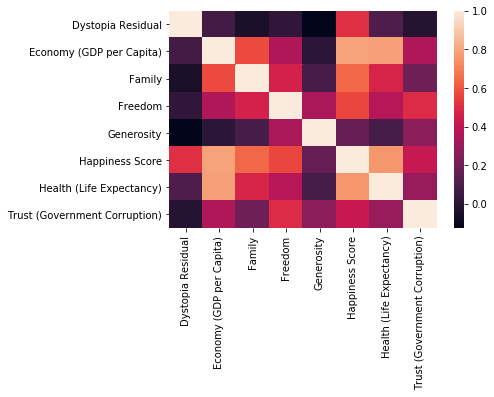

In [14]:
corr = happiness.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [15]:
#Most Related Columns: Economy (GDP per Capita)	Health (Life Expectancy)	Trust (Government Corruption)

In [16]:
columns_2 = ['Happiness Score', 'Family','Freedom','Generosity', 'Dystopia Residual']
temp_dataframe = sort_2016.drop(columns_2, axis=1)
X = temp_dataframe
X.head()

,Economy (GDP per Capita),Health (Life Expectancy),Trust (Government Corruption)
144,0.38227,0.17344,0.07112
102,0.95530,0.73007,0.05301
36,1.05266,0.61804,0.16157
132,0.84731,0.04991,0.08434
24,1.15137,0.69711,0.07296


In [17]:
label='Happiness Score'
y = hap_16[label]
regressor = LinearRegression()
model = regressor.fit(X,y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [18]:
new_features = ['Trust (Government Corruption)','Health (Life Expectancy)','Economy (GDP per Capita)']
train_x = sort0_2017[new_features]
train_y = sort0_2017[label]
prediction = regressor.predict(train_x)

In [19]:
temp_df = pd.DataFrame()
temp_df['Original Happiness Score'] = train_y
temp_df['Predicted 2018 Happiness Score'] = prediction 
temp_df.head()

,Original Happiness Score,Predicted 2018 Happiness Score
134,3.794,5.198511
106,4.644,4.850852
51,5.872,4.777943
133,3.795,4.888381
23,6.599,4.723699


In [20]:
temp_df['Country'] = sort0_2017['Country']

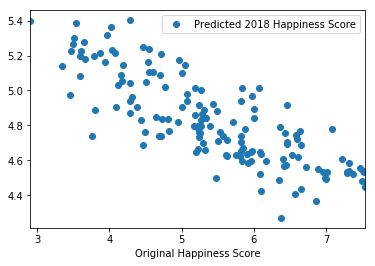

In [21]:
temp_df.plot(x='Original Happiness Score', y='Predicted 2018 Happiness Score', style='o')

In [22]:
mse = mean_absolute_error(sort0_2017[label],prediction)
mean_squared_error_value = sqrt(mean_squared_error(y_true=train_y,y_pred=prediction))
print('Mean Squared Error Value:', mean_squared_error_value)
print('Mean Absolute Error:', mse)

Mean Squared Error Value: 1.4459898911608933
Mean Absolute Error: 1.2076840546364256


In [23]:
columns_2 = ['Happiness Score', 'Family','Freedom','Generosity', 'Dystopia Residual']
temp_dataframe2 = happiness.drop(columns_2, axis=1)
X2 = temp_dataframe
X2.head()

,Economy (GDP per Capita),Health (Life Expectancy),Trust (Government Corruption)
144,0.38227,0.17344,0.07112
102,0.95530,0.73007,0.05301
36,1.05266,0.61804,0.16157
132,0.84731,0.04991,0.08434
24,1.15137,0.69711,0.07296


In [24]:
label='Happiness Score'
y2 = hap_17[label]
regressor2 = LinearRegression()
model2 = regressor2.fit(X2,y)
print(model2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [25]:
new_features = ['Trust (Government Corruption)','Health (Life Expectancy)','Economy (GDP per Capita)']
train_x2 = happiness[new_features]
train_y2 = happiness[label]
prediction2 = regressor2.predict(train_x2)

In [26]:
temp_df2 = pd.DataFrame()
temp_df2['Original Happiness Score'] = train_y2
temp_df2['Predicted 2018 Happiness Score'] = prediction2 
temp_df2.head()

,Original Happiness Score,Predicted 2018 Happiness Score
142,3.575,5.261098
90,4.959,4.934009
65,5.605,4.877741
128,4.033,4.963441
28,6.574,4.816977


In [27]:
mse2 = mean_absolute_error(happiness[label],prediction2)
mean_squared_error_value2 = sqrt(mean_squared_error(y_true=train_y2,y_pred=prediction2))
print('Mean Squared Error Value:', mean_squared_error_value2)
print('Mean Absolute Error:', mse2)

Mean Squared Error Value: 1.4441148896327132
Mean Absolute Error: 1.2019602460177359


In [28]:
hap_18 = pd.read_csv("2018.csv")
new_2018 = hap_18.sort_values(by=['Country'])
new_2018.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
98,145,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036,2.232
20,112,Albania,4.586,0.916,0.817,0.790,0.419,0.149,0.032,1.495
104,84,Algeria,5.295,0.979,1.154,0.687,0.077,0.055,0.135,2.343
30,142,Angola,3.795,0.730,1.125,0.269,0.000,0.079,0.061,1.592
116,29,Argentina,6.388,1.073,1.468,0.744,0.570,0.062,0.054,2.471


In [29]:
mse3 = mean_absolute_error(hap_18['Happiness Score'],prediction)
print('Mean Absolute Error:', mse3)

Mean Absolute Error: 1.0221023243784515
